<a href="https://www.kaggle.com/code/leotom/btp-phase-1-2?scriptVersionId=149823255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [2]:
data_dir = '/kaggle/input/plant-village-dataset/raw'

In [3]:
import os
from os import listdir

In [4]:
base_path = "/kaggle/input/plant-village-dataset/raw/color"

In [5]:
os.listdir(base_path)

['Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Corn_(maize)___healthy']

In [6]:
len(os.listdir(base_path))

25

In [7]:
from glob import glob
imagePatches = glob("//kaggle/input/plant-village-dataset/raw/color/*/*.*", recursive=True)

In [8]:
len(imagePatches)

30247

In [9]:
image_path = base_path + "/Tomato_Bacterial_spot/3a5a5fef-8a3a-4f70-ab85-eaf5e3ecf6f2___GCREC_Bact.Sp 3449.JPG"

In [10]:
dir_name = os.path.dirname(image_path)

In [11]:
len(dir_name.split("/"))

7

In [12]:
from fastai import *
from fastai.vision import *
from fastai.vision.data import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from pathlib import Path

from math import floor

import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer
import pickle
import os
from tensorflow.keras.utils import img_to_array
from keras.applications.resnet import ResNet50
from keras.layers import GlobalMaxPooling2D, Dense, GlobalAveragePooling2D
from keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

default_image_size = tuple((229, 229))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
dir_name.split("/")[6]

'Tomato_Bacterial_spot'

##### IMAGE PROCESSING

In [14]:
path = Path(base_path)

In [15]:
path

Path('/kaggle/input/plant-village-dataset/raw/color')

In [16]:
directory_root = '/kaggle/input/plant-village-dataset/raw/color'


In [17]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            x = img_to_array(image)
            return x #np.expand_dims(x, axis=0)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [18]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    plant_disease_folder_list = listdir(f"{directory_root}")

    for disease_folder in plant_disease_folder_list :
        # remove .DS_Store from list
        if disease_folder == ".DS_Store" :
            plant_disease_folder_list.remove(disease_folder)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{directory_root}/{plant_disease_folder}/")

        for single_plant_disease_image in plant_disease_image_list :
            if single_plant_disease_image == ".DS_Store" :
                plant_disease_image_list.remove(single_plant_disease_image)

        for image in plant_disease_image_list[:200]:
            image_directory = f"{directory_root}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Soybean___healthy ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Peach___Bacterial_spot ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Cherry_(including_sour)___healthy ...
[INFO] Processin

In [19]:
def get_labels(file_path):
    return os.path.basename(os.path.dirname(file_path))

In [20]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            x = img_to_array(image)
            return x #np.expand_dims(x, axis=0)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [21]:
np_image_list = np.array(image_list, dtype=np.float16)
#print("Total no. of y:{}".format(np_label.shape))
#print("Total no. of images:{}".format(image_list.shape))

softmax_output = len(plant_disease_folder_list)

In [22]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(n_classes)

25


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(np_image_list,image_labels,test_size=0.3,random_state=42)

## RESNET

In [24]:
model = ResNet50(include_top=False,
    weights="imagenet")
X = model.output
X = GlobalMaxPooling2D()(X)
predictions = Dense(softmax_output, activation='softmax')(X)

94765736/94765736 [==============================] - 4s 0us/step


In [25]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [26]:
batch_size = 16
epochs = 20
INIT_LR = 1e-3
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [27]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

In [28]:
alpha = 1e-5
opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule)

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)

Resnet_model = Model(inputs=model.input, outputs=predictions)
Resnet_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=["accuracy"])


In [29]:
r = Resnet_model.fit(
    aug.flow(X_train, Y_train, batch_size=16),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=my_callbacks,
    validation_data=(X_test, Y_test),
    shuffle=True
)

Epoch 1/20
217/217 [==============================] - 56s 203ms/step - loss: 2.7267 - accuracy: 0.6662 - val_loss: 0.8352 - val_accuracy: 0.8701
Epoch 2/20
217/217 [==============================] - 39s 180ms/step - loss: 0.4495 - accuracy: 0.9103 - val_loss: 0.3993 - val_accuracy: 0.9240
Epoch 3/20
217/217 [==============================] - 39s 179ms/step - loss: 0.2643 - accuracy: 0.9432 - val_loss: 0.3242 - val_accuracy: 0.9495
Epoch 4/20
217/217 [==============================] - 40s 182ms/step - loss: 0.1830 - accuracy: 0.9602 - val_loss: 0.2048 - val_accuracy: 0.9616
Epoch 5/20
217/217 [==============================] - 39s 182ms/step - loss: 0.1785 - accuracy: 0.9619 - val_loss: 0.1994 - val_accuracy: 0.9603
Epoch 6/20
217/217 [==============================] - 39s 180ms/step - loss: 0.1495 - accuracy: 0.9665 - val_loss: 0.1528 - val_accuracy: 0.9697
Epoch 7/20
217/217 [==============================] - 39s 181ms/step - loss: 0.1190 - accuracy: 0.9691 - val_loss: 0.1286 - val_ac

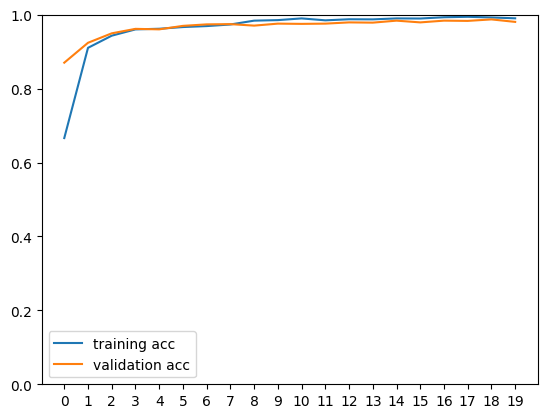

<Figure size 640x480 with 0 Axes>

In [30]:
plt.plot(r.history['accuracy'], label='training acc')
plt.plot(r.history['val_accuracy'], label='validation acc')
plt.xticks([i for i in range(20)])
plt.ylim([0, 1])
plt.legend()
plt.show()
plt.savefig('Accuracy_Plot2')

## INCEPTION V3

In [31]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [32]:
model = InceptionV3(include_top=False,
    weights="imagenet")

X = model.output
X = GlobalMaxPooling2D()(X)
predictions = Dense(softmax_output, activation='softmax')(X)

87910968/87910968 [==============================] - 3s 0us/step


In [33]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [34]:
batch_size = 16
epochs = 20
INIT_LR = 1e-3
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [35]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

In [36]:
alpha = 1e-5
opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule)

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)

Inception_model = Model(inputs=model.input, outputs=predictions)
Inception_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=["accuracy"])


In [37]:
r = Inception_model.fit(
    aug.flow(X_train, Y_train, batch_size=16),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=my_callbacks,
    validation_data=(X_test, Y_test),
    shuffle=True
)

Epoch 1/20
217/217 [==============================] - 53s 206ms/step - loss: 2.2728 - accuracy: 0.3785 - val_loss: 1.0814 - val_accuracy: 0.6837
Epoch 2/20
217/217 [==============================] - 39s 179ms/step - loss: 0.7857 - accuracy: 0.7666 - val_loss: 0.4881 - val_accuracy: 0.8445
Epoch 3/20
217/217 [==============================] - 39s 180ms/step - loss: 0.4771 - accuracy: 0.8488 - val_loss: 0.3284 - val_accuracy: 0.8991
Epoch 4/20
217/217 [==============================] - 41s 186ms/step - loss: 0.3675 - accuracy: 0.8849 - val_loss: 0.2417 - val_accuracy: 0.9219
Epoch 5/20
217/217 [==============================] - 40s 186ms/step - loss: 0.2885 - accuracy: 0.9129 - val_loss: 0.2059 - val_accuracy: 0.9287
Epoch 6/20
217/217 [==============================] - 40s 183ms/step - loss: 0.2647 - accuracy: 0.9149 - val_loss: 0.2004 - val_accuracy: 0.9307
Epoch 7/20
217/217 [==============================] - 39s 181ms/step - loss: 0.2058 - accuracy: 0.9296 - val_loss: 0.1654 - val_ac

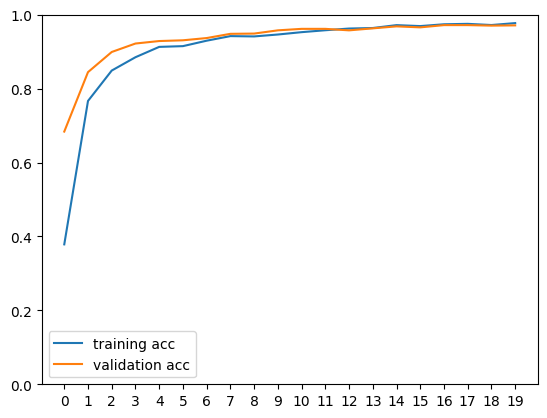

<Figure size 640x480 with 0 Axes>

In [38]:
plt.plot(r.history['accuracy'], label='training acc')
plt.plot(r.history['val_accuracy'], label='validation acc')
plt.xticks([i for i in range(20)])
plt.ylim([0, 1])
plt.legend()
plt.show()
plt.savefig('Accuracy_Plot2')